In [68]:
import pandas as pd
import numpy as np

In [76]:
# Hyper Parameter
LINE = 7
COLUMN = 13

In [77]:
point_array = np.zeros((LINE*COLUMN,5))
point_array[:,0] = np.arange(LINE*COLUMN)
for j in range(LINE):
    for i in range(COLUMN):
        point_index = i + j*COLUMN
        point_array[point_index,1] = i
        point_array[point_index,2] = j
        point_array[point_index,3] = 1 if np.random.rand() > 0.8 else 0
        point_array[point_index,4] = 0.5*np.random.rand() + 0.5
point_array[0,3] = -1
point_array[-1,3] = 2
point_frame = pd.DataFrame(point_array,columns=['point','x','y','charger','price'])

In [78]:
point_frame.to_csv('node.csv',index=False)

In [79]:
point_frame.head()

,point,x,y,charger,price
0,0.0,0.0,0.0,-1.0,0.777063
1,1.0,1.0,0.0,0.0,0.737540
2,2.0,2.0,0.0,0.0,0.883916
3,3.0,3.0,0.0,0.0,0.907396
4,4.0,4.0,0.0,0.0,0.734487


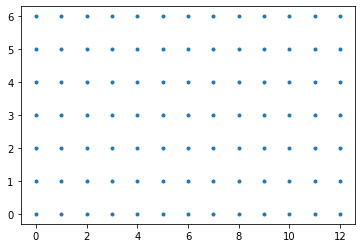

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(point_array[:,1],point_array[:,2],'.')

In [81]:
edge_array = np.zeros(((LINE-1)*COLUMN + (COLUMN-1)*LINE,3))
ind = 0
def add_edge(m,n):
    global ind, edge_array
    edge_array[ind, 0] = m
    edge_array[ind, 1] = n
    edge_array[ind, 2] = 20*np.random.rand() + 110
    ind += 1
    
for j in range(LINE):
    for i in range(COLUMN):
        point_ind = i + j*COLUMN
        if i + 1 >= COLUMN and j+1 >= LINE:
            continue
        elif i + 1 >= COLUMN:
            add_edge(point_ind,point_ind + COLUMN)
        elif j + 1 >= LINE:
            add_edge(point_ind,point_ind+1)
        else:
            add_edge(point_ind,point_ind+1)
            add_edge(point_ind,point_ind + COLUMN)
edge_frame = pd.DataFrame(edge_array,columns=['point1','point2','dis'])

In [82]:
edge_frame.to_csv('edge.csv',index=False)

In [83]:
edge_frame.head()

,point1,point2,dis
0,0.0,1.0,124.764863
1,0.0,13.0,123.610550
2,1.0,2.0,121.779632
3,1.0,14.0,124.860356
4,2.0,3.0,119.870200
